In [1]:
import sys
from pathlib import Path

import cv2
import numpy as np

sys.path.append(str(Path.cwd().parent))
from src.regiongrower import RegionGrower

In [2]:
from pathlib import Path

from src.face import FaceDetector
from src.mask import MaskHandler
from src.projectUtils import Utils
from src.superpixels import SuperpixelExtractor, FeatureExtractor
from src.regiongrower import RegionGrower

In [3]:
fd = FaceDetector("../assets/lbfmodel.yaml")
mh = MaskHandler()

IMAGE_PATH = Path("test_images/face.jpg")

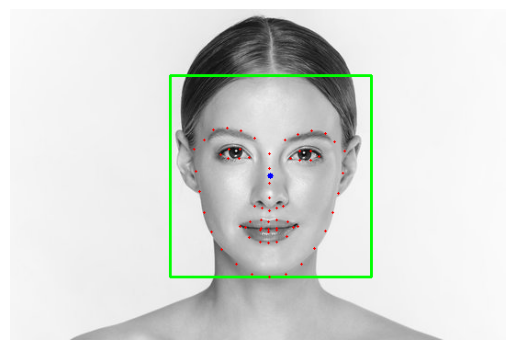

In [4]:
img_rgb, _, _, landmarks_all_faces = fd.detect(IMAGE_PATH)
Utils.display(img_rgb)

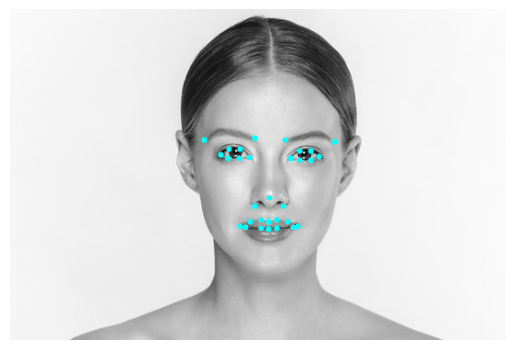

1


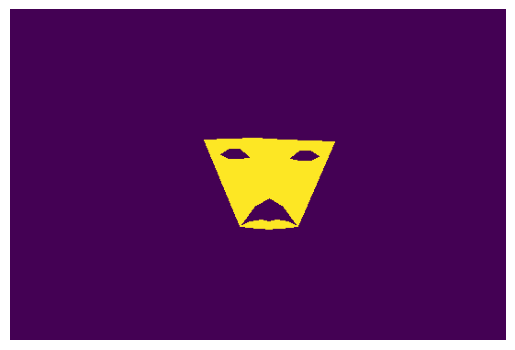

In [5]:
masked_img, selected_pts = mh.get_mask_points(IMAGE_PATH, landmarks_all_faces)
Utils.display(masked_img)

masks, masked_imgs = mh.build_masks(IMAGE_PATH, selected_pts)
print(len(masks))
Utils.display(masks[0])

1


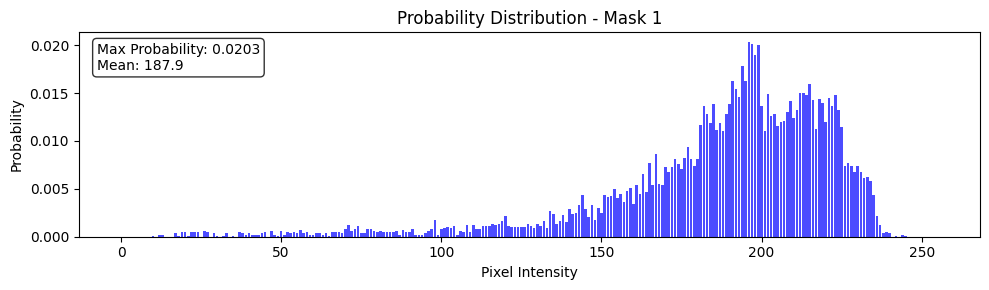

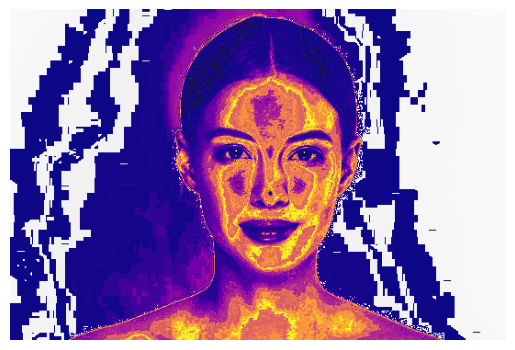

In [6]:
intensity_histograms = mh.get_intensity_histograms(IMAGE_PATH, masks)

print(len(intensity_histograms))
Utils.visualize_histograms(intensity_histograms)
Utils.apply_intensity_probability_map(IMAGE_PATH, intensity_histograms[0])

1
1
1


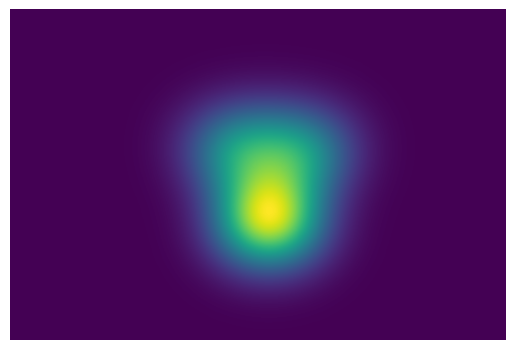

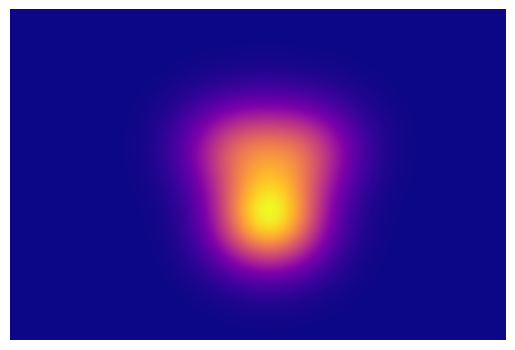

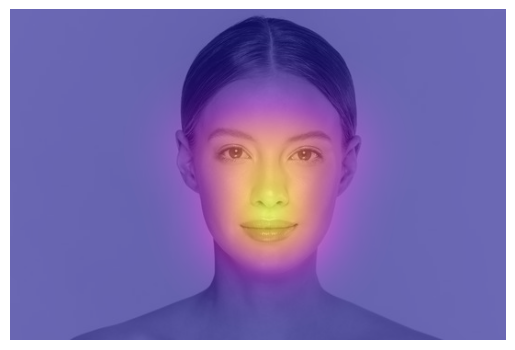

In [7]:
prior_face_masks, heatmaps, heatmaps_blended = mh.get_prior_face_masks(
    IMAGE_PATH, selected_pts
)

print(len(prior_face_masks))
print(len(heatmaps))
print(len(heatmaps_blended))

idx = 0

Utils.display(prior_face_masks[idx])
Utils.display(heatmaps[idx])
Utils.display(heatmaps_blended[idx])

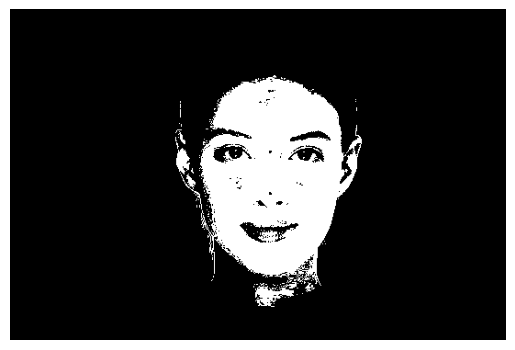

In [8]:
alpha = 0.69
lambda_ = 0.0018

skin_pixel_maps = mh.get_skin_pixel_maps(
    IMAGE_PATH, intensity_histograms, prior_face_masks, alpha, lambda_
)

for i in skin_pixel_maps:
    Utils.display(i, cmap="gray")

In [9]:
spe = SuperpixelExtractor()
fe = FeatureExtractor()

slic, contoured_img, labels, num_superpixels = spe.get_slic_superpixels(IMAGE_PATH)

1
1
1


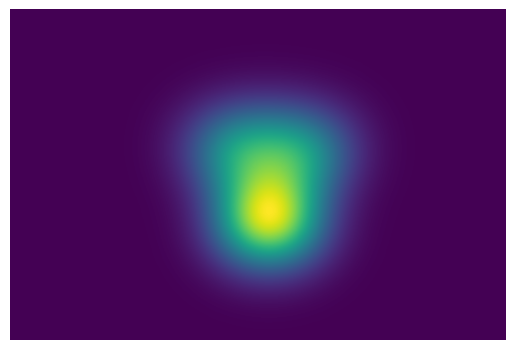

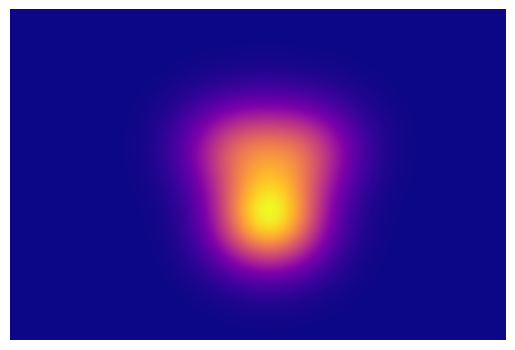

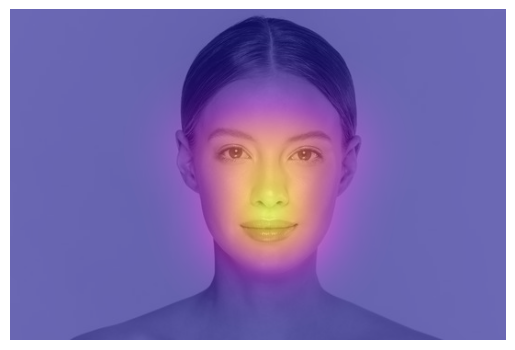

In [10]:
prior_face_masks, heatmaps, heatmaps_blended = mh.get_prior_face_masks(
    IMAGE_PATH, selected_pts
)

print(len(prior_face_masks))
print(len(heatmaps))
print(len(heatmaps_blended))

idx = 0

Utils.display(prior_face_masks[idx])
Utils.display(heatmaps[idx])
Utils.display(heatmaps_blended[idx])

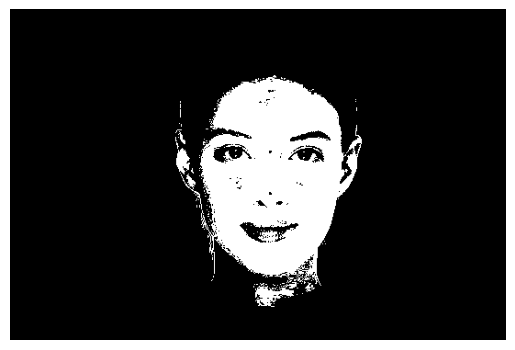

In [11]:
alpha = 0.69
lambda_ = 0.0018

skin_pixel_maps = mh.get_skin_pixel_maps(
    IMAGE_PATH, intensity_histograms, prior_face_masks, alpha, lambda_
)

for i in skin_pixel_maps:
    Utils.display(i, cmap="gray")

In [12]:
spe = SuperpixelExtractor()
fe = FeatureExtractor()

slic, contoured_img, labels, num_superpixels = spe.get_slic_superpixels(IMAGE_PATH)

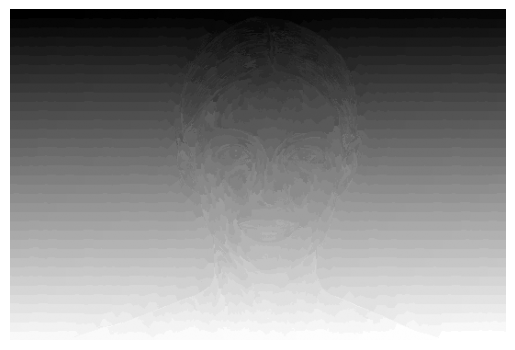

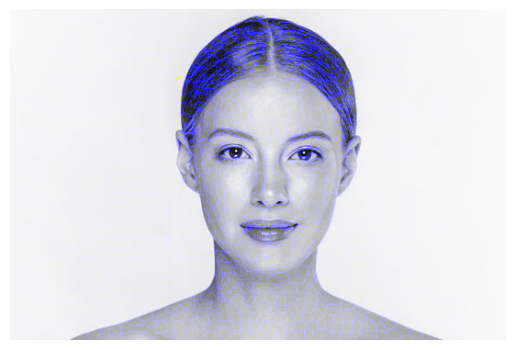

In [13]:
Utils.display(labels, cmap="gray")
Utils.display(contoured_img)

In [14]:
feature_vectors_sp = fe.extract_all_features_superpixels(IMAGE_PATH, slic)
print(feature_vectors_sp)

[{'label': 0, 'mean_intensity': 249.19834710743802, 'std_intensity': 0.39875497791123365, 'entropy': 0.3388823317671177, 'lacunarity_vector': array([1.        , 0.96694215, 0.23966942, 0.85123967, 1.        ,
       0.47107438, 1.        , 1.        , 1.        , 0.23966942,
       0.85123967, 1.        , 1.        , 0.47107438, 0.91735537,
       0.38016529, 1.        , 1.        , 0.84297521, 0.70247934,
       1.        , 1.        , 0.96694215, 0.9338843 , 0.38016529,
       0.80165289, 0.96694215, 0.59504132, 0.96694215, 1.        ,
       1.        , 0.38016529, 0.80165289, 0.97520661, 0.88429752,
       0.59504132, 0.82644628, 0.47107438, 1.        , 1.        ,
       0.7768595 , 0.8677686 , 1.        , 1.        ])}, {'label': 1, 'mean_intensity': 249.0, 'std_intensity': 0.0, 'entropy': 0.05354938088195042, 'lacunarity_vector': array([1.        , 1.        , 0.11009174, 1.        , 1.        ,
       0.34862385, 1.        , 1.        , 0.99082569, 0.11926606,
       1.        

In [15]:
feature_vector = fe.extract_all_features_mask(IMAGE_PATH, skin_pixel_maps[0])
print(feature_vector)

{'mean_intensity': 194.39249458195505, 'std_intensity': 19.914359128414716, 'entropy': 3.4498399063308924, 'lacunarity_vector': array([0.88525151, 0.54731759, 0.89855899, 0.8275731 , 0.52728033,
       0.93407095, 0.95433634, 0.71845177, 0.94224554, 0.93353865,
       0.9482149 , 0.69263526, 0.95182693, 0.97289076, 0.980419  ,
       0.8382571 , 0.98501958, 0.96916467, 0.97825178, 0.81559637,
       0.98616022, 0.98920193, 0.83935972, 0.55172807, 0.91969887,
       0.81669898, 0.51001863, 0.94334816, 0.94977377, 0.70913653,
       0.94638987, 0.96015361, 0.94882324, 0.67818714, 0.95669366,
       0.97627467, 0.97809969, 0.82753507, 0.98437322, 0.98323258,
       0.97387932, 0.82985438, 0.98391696, 0.98988632])}


In [16]:
individual_feature_probs, norm_params = fe.calculate_feature_learned_probability(
    feature_vectors_sp, feature_vector
)

In [17]:
print(individual_feature_probs)

[{'label': 0, 'mean_intensity': 0.5045614337267006, 'std_intensity': 0.5128092544046263, 'entropy': 0.5797088611623804, 'lacunarity_vector': 0.6291844002143899}, {'label': 1, 'mean_intensity': 0.5045780009994645, 'std_intensity': 0.5125528420897529, 'entropy': 0.573109986323392, 'lacunarity_vector': 0.6107679966459484}, {'label': 2, 'mean_intensity': 0.5046426109562885, 'std_intensity': 0.512827869335542, 'entropy': 0.5810863812723018, 'lacunarity_vector': 0.6279749991418734}, {'label': 3, 'mean_intensity': 0.5047102536106093, 'std_intensity': 0.5128752965779494, 'entropy': 0.5869617717929959, 'lacunarity_vector': 0.6471161292033195}, {'label': 4, 'mean_intensity': 0.5047179572777687, 'std_intensity': 0.512866352216981, 'entropy': 0.5883810853068192, 'lacunarity_vector': 0.6558157750159886}, {'label': 5, 'mean_intensity': 0.5047457201791616, 'std_intensity': 0.5127157119662804, 'entropy': 0.5760881726323751, 'lacunarity_vector': 0.611792697272647}, {'label': 6, 'mean_intensity': 0.5047

In [18]:
combined_probability = fe.calculate_combined_probability(individual_feature_probs)
print(combined_probability)

[{'label': 0, 'p': 0.09437517963915025}, {'label': 1, 'p': 0.09052764161590024}, {'label': 2, 'p': 0.09443621851731418}, {'label': 3, 'p': 0.09832092385076648}, {'label': 4, 'p': 0.09988344798315067}, {'label': 5, 'p': 0.0912100133563788}, {'label': 6, 'p': 0.09777428959351793}, {'label': 7, 'p': 0.0930670934624746}, {'label': 8, 'p': 0.09352804908739698}, {'label': 9, 'p': 0.09650036997910039}, {'label': 10, 'p': 0.09536371936680305}, {'label': 11, 'p': 0.10090528116586205}, {'label': 12, 'p': 0.09401215999460563}, {'label': 13, 'p': 0.08956722176972667}, {'label': 14, 'p': 0.09728021342961958}, {'label': 15, 'p': 0.10068752166109682}, {'label': 16, 'p': 0.09580322728058821}, {'label': 17, 'p': 0.09470050251572298}, {'label': 18, 'p': 0.09672673932809724}, {'label': 19, 'p': 0.10327727626105632}, {'label': 20, 'p': 0.09851627170604493}, {'label': 21, 'p': 0.10014459622627506}, {'label': 22, 'p': 0.10961784602336444}, {'label': 23, 'p': 0.12142701526815317}, {'label': 24, 'p': 0.140168

In [19]:
region_grower = RegionGrower()

In [20]:
seed_mask_for_labels = skin_pixel_maps[0].astype(bool)
unique_labels_in_mask = np.unique(labels[seed_mask_for_labels])
actual_seed_labels = set(int(lbl) for lbl in unique_labels_in_mask if lbl != -1)
print(len(actual_seed_labels))

341


In [21]:
initial_combined_probs_list = [
    {"label": item["label"], "initial_combined_prob": item["p"]}
    for item in combined_probability
]

In [22]:
final_skin_labels = region_grower.grow(
    feature_vectors_sp,
    initial_combined_probs_list,
    labels,
    actual_seed_labels,
    norm_params,
)

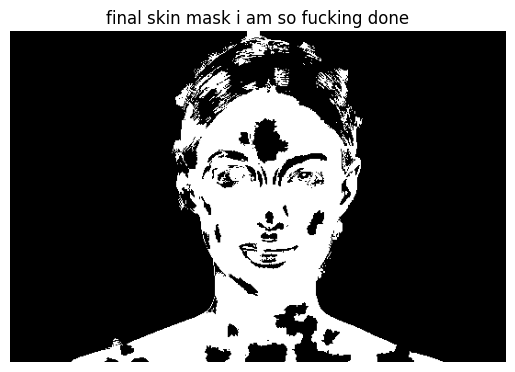

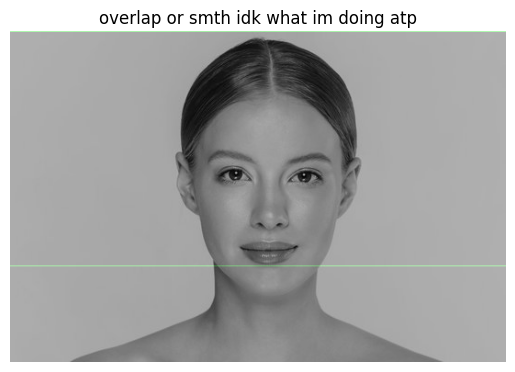

In [23]:
skin_region_mask = np.zeros_like(labels, dtype=np.uint8)
for label_val in final_skin_labels:
    skin_region_mask[labels == label_val] = 255
Utils.display(
    skin_region_mask, title="final skin mask i am so fucking done", cmap="gray"
)

img_gray_orig = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
img_rgb_orig = cv2.cvtColor(img_gray_orig, cv2.COLOR_GRAY2RGB)
overlay = np.zeros_like(img_rgb_orig)
overlay[skin_region_mask] = [0, 255, 0]
result_img = cv2.addWeighted(img_rgb_orig, 0.7, overlay, 0.3, 0)
Utils.display(result_img, title="overlap or smth idk what im doing atp")